In [10]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 02 15:51:37 2018

@author: Shawnzy
"""
import warnings
warnings.filterwarnings('ignore')
#%% Imports
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA

out = './'

cancer = pd.read_hdf('../Input_Data/datasets.hdf','cancer')
cancerX = cancer.drop('diagnosis',1).copy().values
cancerY = cancer['diagnosis'].copy().values

madelon = pd.read_hdf('../Input_Data/datasets.hdf','madelon')        
madelonX = madelon.drop('Class',1).copy().values
madelonY = madelon['Class'].copy().values

cancer_dims = range(2,31)
madelon_dims = range(2,460)

ica = FastICA(random_state=5)

[[-0.00251808 -0.00119316 -0.00261741 -0.00254215 -0.00164024 -0.00275255
  -0.00297243 -0.00300065 -0.00158936 -0.00074038 -0.00236941 -0.00020048
  -0.00243092 -0.00233365 -0.00016716 -0.00196007 -0.00176677 -0.00210989
  -0.00048887 -0.00117986 -0.00262269 -0.00120173 -0.00272211 -0.00258673
  -0.00147186 -0.00241677 -0.00263156 -0.00288599 -0.0014138  -0.00151594]]


<Figure size 432x288 with 0 Axes>

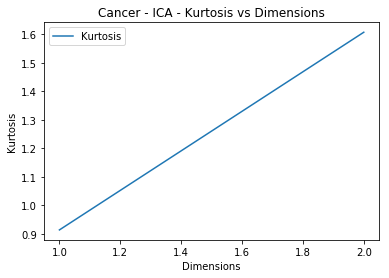

In [11]:
cancer_evals = defaultdict(lambda: defaultdict(dict))
for dim in cancer_dims:
    """Apply the dimensionality reduction algorithms to the two datasets and
    describe what you see."""
    # Apply ICA 
    cscaler = StandardScaler()
    ica.set_params(n_components=dim)    
    X = cscaler.fit_transform(cancerX)
    tmp = ica.fit_transform(X)
    new_cancer = pd.pandas.DataFrame(np.hstack((tmp,cancerY.reshape(len(tmp),1))))
    new_cancer.to_hdf(out+'results.hdf','cancer_ica_dim{}'.format(str(dim)),complib='blosc',complevel=9)

    # Describe ICA results
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    cancer_evals['Kurtosis'][dim] = tmp.abs().mean()
print(ica.components_)
df_cancer = pd.DataFrame(cancer_evals)

df_cancer.to_hdf(out+'results.hdf','cancer_ICA',complib='blosc',complevel=9)

import matplotlib.pyplot as plt 
fig = plt.figure()
ax = df_cancer.plot(y='Kurtosis', title="Cancer - ICA - Kurtosis vs Dimensions")
ax.set(xlabel="Dimensions", ylabel="Kurtosis")
plt.savefig(out+'Plots/cancer_ica.png')

<Figure size 432x288 with 0 Axes>

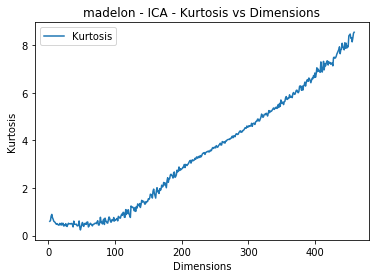

In [4]:
madelon_evals = defaultdict(lambda: defaultdict(dict))
for dim in madelon_dims:
    """Apply the dimensionality reduction algorithms to the two datasets and
    describe what you see."""
    # Apply ICA 
    mscaler = StandardScaler()
    ica.set_params(n_components=dim)    
    X = mscaler.fit_transform(madelonX)
    tmp = ica.fit_transform(X)
    new_madelon = pd.pandas.DataFrame(np.hstack((tmp,madelonY.reshape(len(tmp),1))))
    new_madelon.to_hdf(out+'results.hdf','madelon_ica_dim{}'.format(str(dim)),complib='blosc',complevel=9)

    # Describe ICA results
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    madelon_evals['Kurtosis'][dim] = tmp.abs().mean()

df_madelon = pd.DataFrame(madelon_evals)

df_madelon.to_hdf(out+'results.hdf','madelon_ICA',complib='blosc',complevel=9)

import matplotlib.pyplot as plt 
fig = plt.figure()
ax = df_madelon.plot(y='Kurtosis', title="madelon - ICA - Kurtosis vs Dimensions")
ax.set(xlabel="Dimensions", ylabel="Kurtosis")
plt.savefig(out+'Plots/madelon_ica.png')